# Credit Card Default prediction dataset


### Objective: <BR>
Explore the various machine learning algorithms on on Credit card default prediction balanced labelled dataset. 

### Features: <BR>
a) Not imbalanced data, no smote analysis required here <BR>
b) Labelled data <BR>


#### 1) Importing python libraries & packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
seed=10
np.random.seed(seed)

#Credit_default_dataset.csv   for credit risk modeling...kaggle
#

#### 2) Loading dataset

In [6]:
csv_file = 'Credit_default_dataset.csv'
CR= pd.read_csv(csv_file, encoding = 'utf-8',delimiter = ',')
# If you don't specify the type encoding as `utf-8`, you're going to have a difficult time when you try to convert to SQL.
CR.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


#### 3) EDA & Preprocessing data set

In [7]:
CR.shape

(30000, 25)

In [5]:
CR.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
CR['default.payment.next.month'].value_counts()   ### NOT IMBALANCED DATASET
CR

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

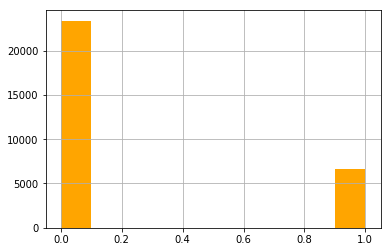

In [17]:
CR['default.payment.next.month'].hist(color = 'orange',grid = True)

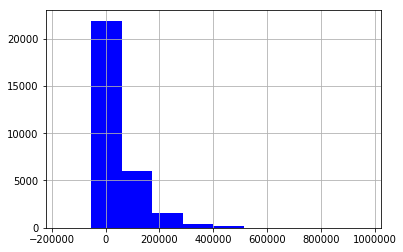

In [22]:
CR['BILL_AMT1'].hist(bins = 10, color = 'blue',grid = True)

In [9]:
CR.shape   ###30000 rows , 25 coulmns

(30000, 25)

In [10]:
###mask  'default.payment.next.month'
Default = CR[CR['default.payment.next.month'] == 1]

In [10]:
#Default.count()     ### 6636 default out of 30,000   ...Balanced dataset

In [11]:
###preprocessing
CR.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
CR["EDUCATION"]=CR["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
CR["MARRIAGE"]=CR["MARRIAGE"].map({0:3,1:1,2:2,3:3})

#### 4) Feature selection

In [24]:
#lets check which features are important
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = CR.drop('default.payment.next.month',axis=1)
Y = CR['default.payment.next.month']
clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
clf.feature_importances_

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.05963484, 0.05832886, 0.01054653, 0.02640806, 0.01762301,
       0.05756624, 0.09637633, 0.04643912, 0.02968244, 0.03667516,
       0.03310119, 0.02819137, 0.04621214, 0.04330016, 0.04365729,
       0.04200986, 0.04024083, 0.0412242 , 0.04188314, 0.03935738,
       0.03885656, 0.03908559, 0.04047397, 0.04312573])

####  5) Standardising with min max scalar

In [25]:
##  Standardising
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(CR)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.00000000e+00, 1.01010101e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.33344445e-05, 1.11111111e-01, 1.00000000e+00, ...,
        0.00000000e+00, 3.78310691e-03, 1.00000000e+00],
       [6.66688890e-05, 8.08080808e-02, 1.00000000e+00, ...,
        2.34450647e-03, 9.45776729e-03, 0.00000000e+00],
       ...,
       [9.99933331e-01, 2.02020202e-02, 0.00000000e+00, ...,
        4.68901294e-03, 5.86381572e-03, 1.00000000e+00],
       [9.99966666e-01, 7.07070707e-02, 0.00000000e+00, ...,
        1.24174441e-01, 3.41236244e-03, 1.00000000e+00],
       [1.00000000e+00, 4.04040404e-02, 0.00000000e+00, ...,
        2.34450647e-03, 1.89155346e-03, 1.00000000e+00]])

####  6) Cleaning null values

In [26]:
## CLEANING NULL VALUES
CR.apply(lambda x: sum(x.isnull()),axis=0) 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### 7) Prepare for modeling

In [27]:
#prepare for modeling
CR = CR.drop(["ID"],axis=1)


In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(CR, test_size = 0.3)

In [29]:
X_train = train.drop('default.payment.next.month',axis=1)

y_train = train['default.payment.next.month']

X_test =  test.drop('default.payment.next.month',axis=1)

y_test = test['default.payment.next.month']


In [30]:
X_train.shape

(21000, 23)

In [31]:
y_train.reshape = (21000,1)

In [32]:
y_train.shape

(21000,)

In [33]:
X_test.shape

(9000, 23)

In [34]:
y_test.reshape = (9000,1)

In [35]:
y_test.shape

(9000,)

#### 8) Modeling
##### Baseline: Logistic regression

In [36]:
# BASELINE
from sklearn.linear_model import LogisticRegression
BASELR = LogisticRegression(random_state=42)
BASELR.fit(X_train, y_train)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred = BASELR.predict(X_test)

In [40]:
print("Baseline: Logistic regression Scores" )
print("------------------------------------" )
print("accuracy:", accuracy_score(y_test, y_pred) )
#print("accuracy:", accuracy_score(y_test, y_pred) )
print("Precision:", precision_score(y_test, y_pred,average='weighted') )
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print('f1_score:', f1_score(y_test,y_pred,average='weighted'))

Baseline: Logistic regression Scores
------------------------------------
accuracy: 0.7862222222222223
accuracy: 0.7862222222222223
Precision: 0.8051952112397348
Recall: 0.7862222222222223
f1_score: 0.6938739119617469


##### Random Forest Classifier

In [44]:
### Using classifiers
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state =42)
RFC.fit(X_train,y_train)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
y_pred = RFC.predict(X_test)
print("Baseline: RandomForestClassifier Scores" )
print("------------------------------------" )
print("accuracy:", accuracy_score(y_test, y_pred) )
print("Precision:", precision_score(y_test, y_pred,average='weighted') )
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print('f1_score:', f1_score(y_test,y_pred,average='weighted'))

Baseline: RandomForestClassifier Scores
------------------------------------
accuracy: 0.8112222222222222
Precision: 0.7888249779137566
Recall: 0.8112222222222222
f1_score: 0.7876843699396264


##### Gradient boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
GBC =GradientBoostingClassifier(random_state=42)

In [55]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [57]:
y_pred = GBC.predict(X_test)

In [58]:
print("Baseline: GradientBoostingClassifier Scores" )
print("------------------------------------" )
print("accuracy:", accuracy_score(y_test, y_pred) )
print("Precision:", precision_score(y_test, y_pred,average='weighted') )
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print('f1_score:', f1_score(y_test,y_pred,average='weighted'))

Baseline: GradientBoostingClassifier Scores
------------------------------------
accuracy: 0.8261111111111111
Precision: 0.8094776427236337
Recall: 0.8261111111111111
f1_score: 0.8051520304505088


In [47]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(random_state= 42)

In [48]:
ABC.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)

In [49]:
y_pred = ABC.predict(X_test)

In [50]:
print("Baseline: ADABoostingClassifier Scores" )
print("------------------------------------" )
print("accuracy:", accuracy_score(y_test, y_pred) )
print("Precision:", precision_score(y_test, y_pred,average='weighted') )
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print('f1_score:', f1_score(y_test,y_pred,average='weighted'))

Baseline: ADABoostingClassifier Scores
------------------------------------
accuracy: 0.8211111111111111
Precision: 0.8029949902168011
Recall: 0.8211111111111111
f1_score: 0.7953665396293879


In [52]:
from sklearn.ensemble import VotingClassifier


In [61]:
VC = VotingClassifier(estimators= [('lr', BASELR), ('rf', RFC), ('gnb', GBC), ('ab',ABC)])

In [62]:
VC.fit(X_train,y_train)

/Users/pramodpaul/anaconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...thm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [63]:
y_pred = VC.predict(X_test)

In [65]:
#voting classifier
print("Voting Classifier Scores" )
print("------------------------------------" )
print("accuracy:", accuracy_score(y_test, y_pred) )
print("Precision:", precision_score(y_test, y_pred,average='weighted') )
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print('f1_score:', f1_score(y_test,y_pred,average='weighted'))

Voting Classifier Scores
------------------------------------
accuracy: 0.8167777777777778
Precision: 0.8024739917932557
Recall: 0.8167777777777778
f1_score: 0.7783372936871348


### GRIDSEARCH CV for finding Hyper parameters


In [68]:
#PERFORMING GRIDSEARCH CV on RF,GB and Adaboost to find best parameter values on 10 fold cross validation set
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score



In [82]:
H_parameters_ada = {'n_estimators' : [15,25,50]}
AD_GS = GridSearchCV(AdaBoostClassifier(random_state=42), H_parameters_ada, cv = 10)

In [83]:
AD_GS.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [15, 25, 50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [84]:
print("Best parameters for Adaboost:",AD_GS.best_params_)

Best parameters for Adaboost: {'n_estimators': 25}


In [75]:
parameters_boost ={'n_estimators' :[15,25,50],
             'min_samples_split' :[3,10,15]
}

GBGC = GridSearchCV(GradientBoostingClassifier(random_state=10), cv=10, param_grid=parameters_boost, scoring='accuracy')
GBGC.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [15, 25, 50], 'min_samples_split': [3, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [78]:
print("Best parameters for GradientBoosting:",GBGC.best_params_)

Best parameters for GradientBoosting: {'min_samples_split': 3, 'n_estimators': 50}


In [85]:
RFGC = GridSearchCV(RandomForestClassifier(random_state=10), cv=10, param_grid=parameters_boost,scoring='accuracy')
RFGC.fit(X_train,y_train)
print("Best parameters for RandomForest:",RFGC.best_params_)

Best parameters for RandomForest: {'min_samples_split': 15, 'n_estimators': 50}
